In [13]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision.transforms as transforms

In [20]:
origin_file = 'datasets/L6N255_4000.h5'
o_h5 = h5py.File(origin_file, 'r')
o_h5.keys()

<KeysViewHDF5 ['Greens', 'anderson', 'chebyshev']>

In [22]:
np.array(o_h5['anderson'][0]).flatten(), np.array(o_h5['chebyshev'][0,0,0,0])

(array([ 6.96469186,  0.2065269 ,  1.63142385,  4.40297536, -4.13522458,
         0.86176524,  1.3410227 ,  0.41840878]),
 array(0.0129169))

In [3]:
c_train_file = 'datasets/chebyshev_0_4000.h5'
c_train_h5 = h5py.File(c_train_file, 'r')
np.array(c_train_h5['anderson'][0]).flatten(), np.array(c_train_h5['chebyshev'][0,0,0,0])

(array([ 6.96469186,  0.2065269 ,  1.63142385,  4.40297536, -4.13522458,
         0.86176524,  1.3410227 ,  0.41840878]),
 array(1.00447011))

In [4]:
c_test_file = 'datasets/chebyshev_testing_1000.h5'
c_test_h5 = h5py.File(c_test_file, 'r')
np.array(c_test_h5['anderson'][0]).flatten(), np.array(c_test_h5['chebyshev'][0,0,0,0])

(array([ 1.58997351,  2.27941756, -0.05643762, -2.71328907, -0.98162041,
         0.82658971,  0.85817836,  0.56812304]),
 array(0.99585183))

In [11]:
o_h5['chebyshev'].shape

(4000, 256, 1, 1)

In [12]:
c_np = np.array(o_h5['chebyshev'])
np.median(np.abs(c_np), axis = 0).shape

(256, 1, 1)

In [23]:
cheby_0 = np.median(np.abs(c_np[:, 0, 0, 0]), axis=0)

In [18]:
np.median(np.abs(c_np), axis = 0)[0]

array([[0.01285941]])

In [19]:
chebyshev_median='chebyshev_median.h5'
c_h5 = h5py.File(chebyshev_median, 'w')
c_h5.create_dataset(name='chebyshev_median', data=np.median(np.abs(c_np), axis = 0))
c_h5.close()
o_h5.close()

In [33]:
test_file = 'datasets/L6N255_testing_1000.h5'
test_h5 = h5py.File(test_file, 'r')

chebyshev_median='chebyshev_median.h5'
c_h5 = h5py.File(chebyshev_median, 'r')
median_test = test_h5['chebyshev'][:] / c_h5['chebyshev_median'][:]

save_name = 'chebyshev_testing_1000.h5'

save_h5 = h5py.File(savename, 'w')
t_h5.create_dataset(name='chebyshev', data=median_test, dtype='float64')
t_h5.create_dataset(name='anderson', data=test_h5['anderson'][:])
test_h5.close()
c_h5.close()

[ 1.58997351  2.27941756 -0.05643762 -2.71328907 -0.98162041  0.82658971
  0.85817836  0.56812304] 0.0128060717275892
(1000, 1, 1)


In [40]:

test_file = 'datasets/L6N255_testing_1000.h5'
test_h5 = h5py.File(test_file, 'r')


median_test.shape, median_test[0,:10, 0, 0], test_h5['chebyshev'][0,:10, 0, 0],  c_h5['chebyshev_median'][:10].flatten()

((1000, 256, 1, 1),
 array([ 0.99585183,  1.79472122, -1.01327828, -1.94266417,  1.06519988,
         2.36347458, -1.15787729, -3.4030798 ,  1.3004036 ,  4.65702547]),
 array([ 0.01280607,  0.00191139, -0.02390714, -0.00525751,  0.02124216,
         0.00791201, -0.01789589, -0.00975457,  0.01417141,  0.01076039]),
 array([0.01285941, 0.00106501, 0.02359385, 0.00270634, 0.01994194,
        0.00334762, 0.01545577, 0.00286639, 0.0108977 , 0.00231057]))

In [41]:
0.0107/0.0023

4.6521739130434785

# 准备test 5 的数据集

In [35]:
# test5 需要的数据查看 
train_origin = 'datasets/L6N255_10000.h5'
file_train = 'datasets/norm_10000.h5'

h5_origin = h5py.File(file_origin, 'r')
anderson = torch.Tensor(h5_origin['anderson'][:])
norm_anderson = transforms.Normalize(mean, std)(anderson)
chebyshev = torch.Tensor(h5_origin['chebyshev'][:])
median_chebyshev = chebyshev / c_h5['chebyshev_median'][:]

h5_train = h5py.File(file_train, 'w')
h5_train.create_dataset(name='anderson', data=norm_anderson,dtype='float64')
h5_train.create_dataset(name='chebyshev', data=median_chebyshev, dtype='float64')
h5_train.close()

In [39]:
file_mean = 'datasets/10000_norm_meta.h5'
h5_mean = h5py.File(file_mean, 'w')

mean = torch.mean(anderson, dim=0)
std = torch.std(anderson, dim=0)
mean.flatten(), std.flatten()
mean.shape
h5_mean.create_dataset(name='mean',data=mean, dtype='float64')
h5_mean.create_dataset(name='std',data=std, dtype='float64')
h5_mean.keys()
h5_mean.close()

In [ ]:
chebyshev_median='datasets/chebyshev_median.h5'
c_h5 = h5py.File(chebyshev_median, 'r')

In [47]:
# test5 需要的数据查看 
test_origin = 'datasets/L6N255_testing_1000.h5'
file_test = 'datasets/norm_test_1000.h5'

h5_origin = h5py.File(file_origin, 'r')
h5_test = h5py.File(file_test, 'w')
anderson = torch.Tensor(h5_origin['anderson'][:])
norm_anderson = transforms.Normalize(mean, std)(anderson)
chebyshev = torch.Tensor(h5_origin['chebyshev'][:])
median_chebyshev = chebyshev / c_h5['chebyshev_median'][:]

h5_test = h5py.File(file_test, 'w')
h5_test.create_dataset(name='anderson', data=norm_anderson,dtype='float64')
h5_test.create_dataset(name='chebyshev', data=median_chebyshev, dtype='float64')
h5_test.close()

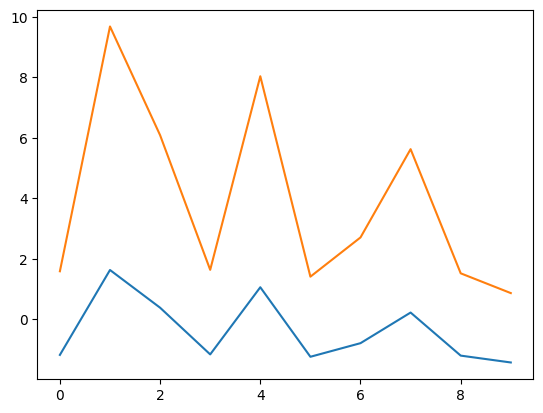

In [49]:
# 规范化是否合理
plt.plot(norm_anderson[:10,0,0,0])
plt.plot(anderson[:10,0,0,0])